# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Although all four flights were ...
1,✅ Trip Verified | Flight changed just one da...
2,Not Verified | Delayed flight 1 hour. Arbitrar...
3,Not Verified | Flown with BA four times. As an...
4,✅ Trip Verified | You may never see your ref...


In [8]:
import os
os.getcwd()
df.to_csv("\\Users\\Envy\\Downloads/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [9]:
!pip install textblob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

In [10]:
file_path = '\\Users\\Envy\\Downloads/data/BA_reviews.csv'  # Update the file name and extension
df = pd.read_csv(file_path)


In [11]:
# Inspect data
df.head()
df.info()

# Drop duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.dropna(subset=['reviews'])  # Replace 'text_column' with your actual text column name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [12]:
import nltk

# Download required datasets
nltk.download('punkt')        # Tokenizer models
nltk.download('stopwords')    # Stopwords corpus


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Envy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Envy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import nltk

try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError as e:
    print(f"Error: {e}")


In [16]:
!pip uninstall -y nltk
!pip install nltk

# Re-download required datasets
nltk.download('punkt')
nltk.download('stopwords')


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
  Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Envy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Envy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import nltk

# Download the 'punkt' tokenizer models
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Envy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# from nltk.tokenize import word_tokenize

# # Sample text to test preprocessing
# sample_text = "This is a sample text to test the preprocessing function."

# # Tokenize the text
# tokens = word_tokenize(sample_text)
# print(tokens)


In [22]:
import nltk
print(nltk.data.find('tokenizers/punkt'))


C:\Users\Envy\AppData\Roaming\nltk_data\tokenizers\punkt


In [24]:
import nltk
nltk.data.path.append('C:\\Users\\Envy\\AppData\\Roaming\\nltk_data')


In [28]:
# import re
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# stop_words = set(stopwords.words('english'))

# def preprocess_text(text):
#     text = text.lower()
#     text = re.sub(r'\d+', '', text)  # Remove digits
#     text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
#     tokens = word_tokenize(text)
#     tokens = [word for word in tokens if word not in stop_words]
#     return ' '.join(tokens)

# df['cleaned_text'] = df['reviews'].apply(preprocess_text)


In [32]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#df = pd.read_csv('data/skytrax_reviews.csv')
df = pd.read_csv(file_path)
# Remove NaNs and duplicate reviews
df.dropna(subset=['reviews'], inplace=True)
df.drop_duplicates(inplace=True)

# Text cleaning
df['Review'] = df['reviews'].str.lower()
df['Review'] = df['reviews'].str.replace(r'\b\w{1,2}\b', '')  # Remove short words
df['Review'] = df['reviews'].str.replace(r'[^\w\s]', '')  # Remove punctuation


C:\Users\Envy\AppData\Local\Temp\ipykernel_14984\3529952886.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['reviews'].str.replace(r'\b\w{1,2}\b', '')  # Remove short words
C:\Users\Envy\AppData\Local\Temp\ipykernel_14984\3529952886.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['reviews'].str.replace(r'[^\w\s]', '')  # Remove punctuation


In [33]:
from textblob import TextBlob

df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['reviews'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Extract topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print_top_words(lda, vectorizer.get_feature_names_out(), 10)


Topic #0:
crew cabin travel verified got trip airways partner british water
Topic #1:
flight ba verified trip british airways london service customer hours
Topic #2:
ba flight service verified trip crew cabin good seat time
Topic #3:
verified food hour ba flight staff trip boarding plane bus
Topic #4:
flight verified class trip ba business food seat seats good



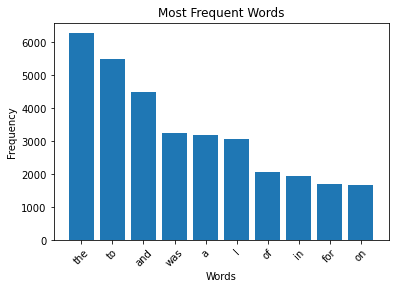

In [37]:
from collections import Counter
import matplotlib.pyplot as plt

words = ' '.join(df['reviews']).split()
word_counts = Counter(words)

common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words')
plt.xticks(rotation=45)
plt.show()
